# Breve exploración de metapoblaciones en paisajes fragmentados

Propuesta para charla en EOBM 2016.

Imágenes: https://www.flickr.com/photos/davidchief/2765256546/
https://www.flickr.com/photos/eugene_o/24379350364/

In [1]:
# Módulos necesarios
import numpy
from ipywidgets import interactive
from scipy.integrate import odeint
from matplotlib import pyplot
from IPython.display import display

In [63]:
numpy.set_printoptions(precision=3)
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 18
pyplot.rcParams['axes.labelsize'] = 24
pyplot.rcParams['figure.figsize']=(13, 8)
#pyplot.rcParams['lines.linewidth'] = 4

## Modelo original de Levins (1969)

$$\frac{dp}{dt} = cp(h-p) -ep$$

![Image](../levins.png)

#### Figura 1

In [ ]:
def levins_a(populated, t, colonization, habitat, extinction): 
    """
    Modelo de metapoblaciones de Levins (1969)
    populated (out of suitable patches)
    """
    d_populated = colonization * populated * habitat * (1-populated) \
                - extinction * populated
    return d_populated

In [3]:
def levins(populated, t, colonization, habitat, extinction): 
    """
    Modelo de metapoblaciones de Levins (1969)
    populated (out of all patches)
    """
    d_populated = colonization * populated * (habitat-populated) \
                - extinction * populated
    return d_populated

In [ ]:
colonization = 0.8
habitat = 1
extinction = 0.1
initial_population = 0.5

In [10]:
#t_total = 40
tiempo = numpy.linspace(0, 40, 41)

def plot_levins(colonization=0.8, habitat=1, extinction=0, initial_population=0.5):
    populated = odeint(levins, initial_population, tiempo, 
           args=(colonization, habitat, extinction))
    pyplot.figure()
    pyplot.plot(tiempo, populated[:], 
                label = "e/c= {:.3f}".format(extinction/colonization), lw=4)
    pyplot.ylim(-0.05, 1.1)
    pyplot.xlabel('time')
    pyplot.ylabel('populated')
    pyplot.title('Modelo Levins: parches ocupados')
    #pyplot.legend()
    

x = interactive(plot_levins, 
                colonization = (0, 1, 0.05),
                extinction = (0, 1, 0.05),
                habitat = (0, 1, 0.05),
                initial_population = (0, 1, 0.05))

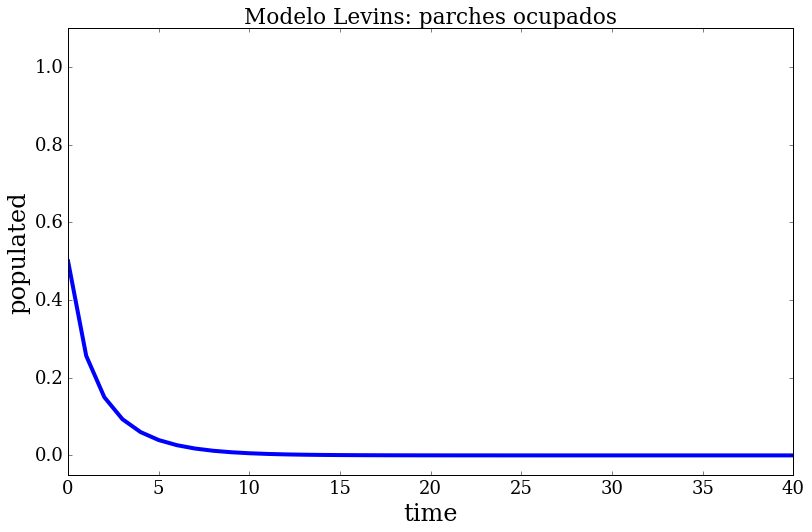

In [11]:
display(x)

In [60]:
def plot_levins_rates(colonization=0.8, extinction=0, habitat=1):
    patches = numpy.linspace(0, 1, 50)
    equilibrium = habitat - extinction/colonization
    colonization_rate = colonization * patches * (habitat - patches)
    extinction_rate = extinction * patches
    
    pyplot.figure()
    
    pyplot.plot(patches, colonization_rate, lw=5, label='colonización')
    pyplot.plot(patches, extinction_rate, '--', lw=5, label='extinción')
    pyplot.plot(equilibrium, equilibrium * extinction, "o", ms=10)
    
    pyplot.ylim(-0.01, 0.3)
    pyplot.xlim(0, 1.01)
    
    pyplot.xlabel('patches')
    pyplot.ylabel('rates')
    pyplot.legend(loc='upper right', fontsize = "small")


    
y = interactive(plot_levins_rates, 
                colonization = (0, 1, 0.1),
                habitat = (0, 1, 0.1),
                extinction = (0, 1, 0.1))

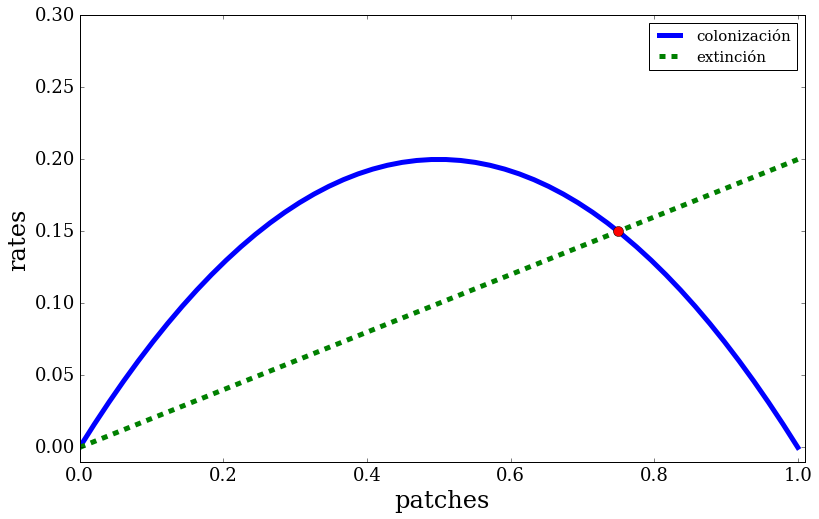

In [61]:
display(y)

# Modelo de Vandermeer & Carvajal (2001)

$$\begin{align*}
x(t+1) &= r[x(t)+iy(t)][1- x(t)- i y(t)]- e x(t) \\
y(t+1) &= e x(t)
\end{align*}$$


In [3]:
def vandermeer(x, y, r, i, e):
    """Modelo de metapoblaciones de Vandermeer & Carvajal (2001)
    """
    x_next = r * (x + i*y)*(1 - x - i*y) - e*x
    if x_next <= 0.001:
        x_next = 0
    
    y_next = e * x
    if y_next <= 0.001:
        y_next = 0
        
    return x_next, y_next

In [24]:
def plot_vandermeer(e):    
    x = [0]*(tiempo + 1)
    y = [0]*(tiempo + 1)
    x[0] = x_0
    y[0] = y_0
    for t in range(tiempo):
        x[t+1], y[t+1] = vandermeer(x[t], y[t], r, i, e)
    
    pyplot.figure()
    pyplot.plot(numpy.linspace(0, tiempo, tiempo+1), x)
    pyplot.plot(numpy.linspace(0, tiempo, tiempo+1), numpy.zeros(tiempo+1), '--', color='red')
    pyplot.ylim(-0.01, 1.1)
    pyplot.xlabel('tiempo')
    pyplot.ylabel('población')
    pyplot.title('Modelo Vandermeer: parche de hábitat')

In [25]:
tiempo = 80
x_0 = 0.3 # population density
y_0 = 0 # population in matrix
r = 3.8 # intrinsic growth rate
i = 0.4 # immigration from matrix to habitat
#e = 0.8 # emigration = quality of matrix

In [26]:
w = interactive(plot_vandermeer, e=(0, 1, 0.05))

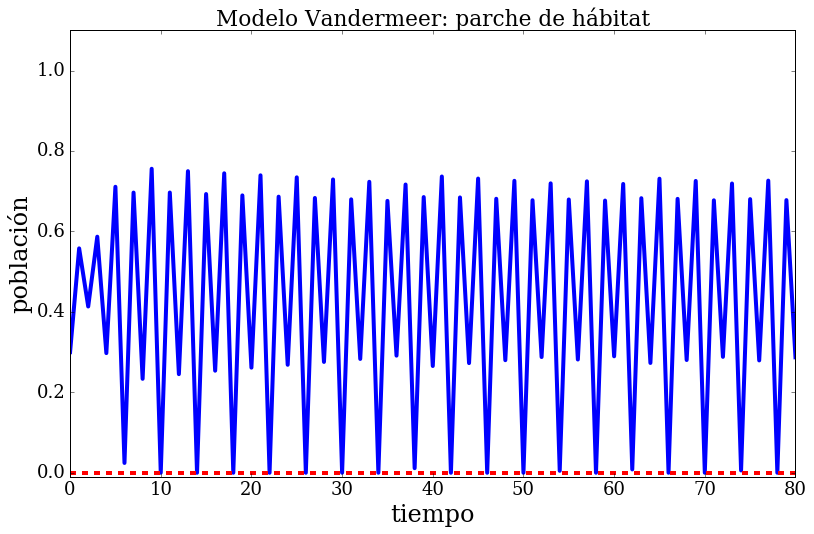

In [27]:
display(w)

In [62]:
# Execute this cell to load the notebook's style sheet, then ignore it
# (From numericalmooc by Lorena Barba)
from IPython.core.display import HTML
css_file = "C:/Users/hp\Desktop/proyectof/stylep.css" #use stylep for presentation mode
HTML(open(css_file, "r").read())